In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
adata = sc.read_h5ad('dataset/Crowley/crowley.h5ad')
adata.layers["counts"] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 6728 × 19373
    obs: 'barcode', 'study', 'sample', 'group'
    layers: 'counts'

In [3]:
import dandelion as ddl
ddl.pp.recipe_scanpy_qc(adata, mito_cutoff = 30)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 34 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden cluste

normalizing counts per cell
    finished (0:00:00)


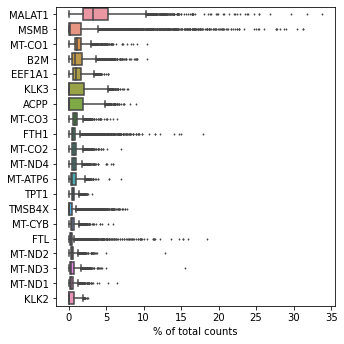

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [5]:
adata = adata[adata.obs['filter_rna'] == False]
adata

View of AnnData object with n_obs × n_vars = 3316 × 19373
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna'
    layers: 'counts'

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [7]:
sc.pp.log1p(adata)

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


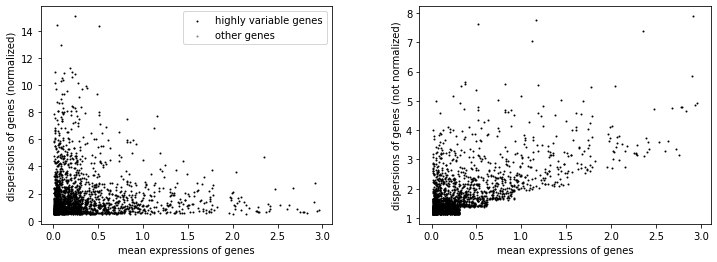

In [12]:
sc.pl.highly_variable_genes(adata)

In [10]:
adata.raw = adata

In [11]:
adata = adata[:, adata.var.highly_variable]

In [13]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:06)


In [14]:
sc.pp.scale(adata, max_value=10)

In [15]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


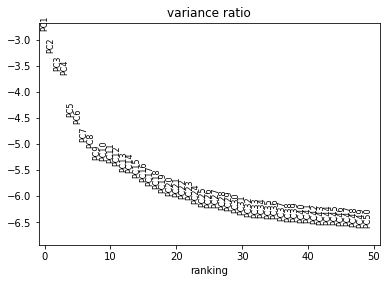

In [16]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [17]:
import bbknn

In [18]:
# sc.external.pp.bbknn not updated yet
bbknn.bbknn(adata, batch_key='sample')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [19]:
sc.tl.umap(adata, min_dist = 0.3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


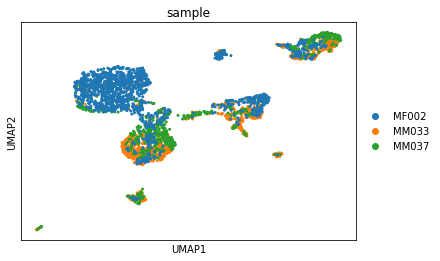

In [20]:
sc.pl.umap(adata, color = 'sample')

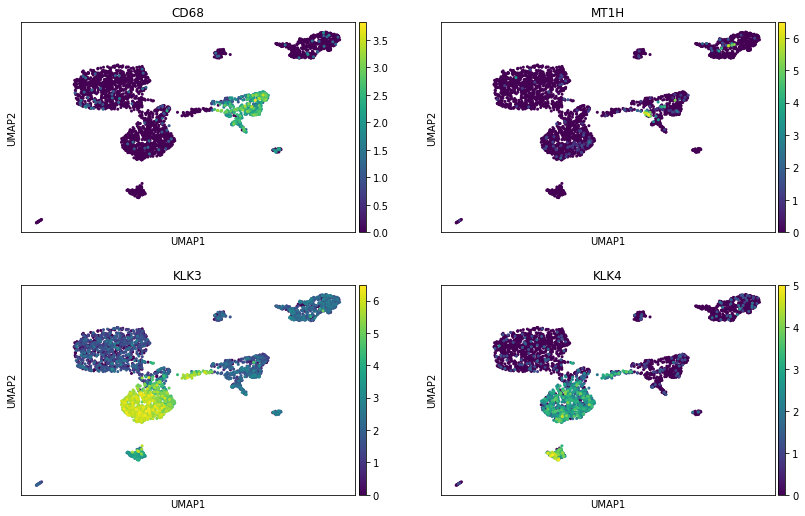

In [21]:
sc.pl.umap(adata, color = ['CD68', 'MT1H', 'KLK3', 'KLK4'], ncols =2)

In [22]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


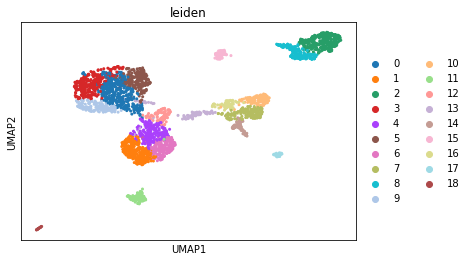

In [23]:
sc.pl.umap(adata, color = 'leiden')

In [24]:
adata.write_h5ad('dataset/Crowley/crowley_filtered.h5ad', compression = 'gzip')